## Ejercicio Modulo 5

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df = pd.read_csv('/Users/varso/MODULO5.0/Data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Borrar columnas id, host_id, host_name

In [2]:
df = df.drop(['id', 'host_id', 'host_name', 'last_review'], axis=1)
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Creación de imputer para poner los Nans a 0

In [3]:
df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns).astype(df.dtypes.to_dict())
df_imputed.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Relleno de los nulos con 0

In [6]:
df_imputed.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

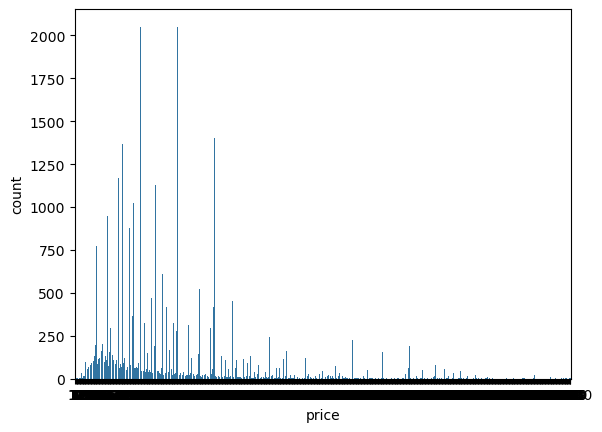

In [7]:
sns.countplot(df_imputed, x='price');

In [8]:
# sns.pairplot(df_imputed)

In [9]:

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Separación X y Y
X = df_imputed[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df_imputed['price']

# DataFrame de resultados

df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])

# REGRESIÓN LINEAL MÚLTIPLE
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) 

df_resultados.loc[len(df_resultados)] = ['RML 5 col', r2, mae, rmse,mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RML 5 col,0.01324,91.175468,238.556558,1.503329e+14


In [10]:
# Particionamiento para Regresión lineal múltiple
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) 

df_resultados.loc[len(df_resultados)] = ['RLM 8 col (test)', r2, mae, rmse, mape]
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
0,RML 5 col,0.013240,91.175468,238.556558,1.503329e+14
1,RLM 8 col (test),0.013002,88.333769,208.957039,1.260488e+14


In [11]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Lo pasamos aún DataFrame para ver más claro todo en columnas 
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X.columns)
x_train_scaled.head(3)

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.00,0.260870,0.322581,0.0,-0.196507
1,-0.25,-0.130435,-0.135484,0.0,-0.200873
2,-0.25,-0.217391,-0.238710,1.0,-0.200873


## El resultado elimina los datos negativos MinMaxScaler

In [12]:

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X.columns)
x_train_scaled.head(3)



,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.001601,0.017488,0.014872,0.000000,0.00274
1,0.000801,0.003180,0.002735,0.000000,0.00000
2,0.000801,0.000000,0.000000,0.003067,0.00000


In [13]:

from sklearn.compose import make_column_selector

# Selector de columnas numéricas
num_selector = make_column_selector(dtype_include=['number'])
columnas_numericas = num_selector(df_imputed)

# Selector de columnas categóricas
cat_selector = make_column_selector(dtype_include=['object', 'category'])
columnas_categoricas = cat_selector(df_imputed)

print("Columnas Numéricas:", columnas_numericas)
print("Columnas Categóricas:", columnas_categoricas)

Columnas Numéricas: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Columnas Categóricas: ['name', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [14]:
X = df_imputed[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df_imputed['price']

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesados', 'R2', 'MAE','RMSE','MAPE'])

def calculate_metrics(prepreocesados_name, x_train, x_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42)
        
    }
    
    for model_name, model in models.items():
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        df_resultados.loc[len(df_resultados)] = [model_name, prepreocesados_name,
                                                r2_score(y_test, y_pred), 
                                                 mean_absolute_error(y_test, y_pred),
                                                 root_mean_squared_error(y_test, y_pred),
                                                 mean_absolute_percentage_error(y_test, y_pred)
                                ]
    return df_resultados.sort_values('R2', ascending=False)

In [15]:
calculate_metrics('Sin preprocesados', X_train,X_test,y_train, y_test)

,Modelo,Preprocesados,R2,MAE,RMSE,MAPE
0,LinearRegression,Sin preprocesados,0.013002,88.333769,208.957039,1.260488e+14
2,SVR,Sin preprocesados,-0.030714,78.556052,213.534435,1.017555e+14
4,RandomForest,Sin preprocesados,-0.134113,90.125483,223.989200,7.710785e+13
1,KNN,Sin preprocesados,-0.218922,94.636568,232.213134,1.125555e+14
3,DecisionTree,Sin preprocesados,-1.167559,108.649642,309.659440,6.908068e+13


## Creando un OneHotEncoder

In [16]:


from sklearn.preprocessing import OneHotEncoder
X = df_imputed[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df_imputed['price']

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

# separamos las columnas categoricas y las numçericas para no nos de errores 
numerical_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list()
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
encoder = OneHotEncoder(sparse_output=False) #sparse_ouput=False para obtenerlo como matriz de 0s y 1s

x_train_encoded = encoder.fit_transform(X_train[categorical_columns]) # Esto es un array de numpy con las codificaciones
x_test_encoded = encoder.transform(x_test[categorical_columns])

# Pasarlo a dataframe de pandas y juntarlo con las numéricas para obtener resultado como pd.get_dummies
#encoder.get_feature_names_out() # los nombres de las nuevas columnas que sean generado
x_train_final = pd.concat(
  [  
    pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # Categoricas
    X_train[numerical_columns].reset_index(drop=True) # Numéricas
  ],
   axis=1
 )   
 
x_test_final = pd.concat(
  [  
    pd.DataFrame(x_test_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # Categoricas
    x_test[numerical_columns].reset_index(drop=True) # Numéricas
  ],
   axis=1
 )  




In [23]:
calculate_metrics('OneHotEncoder', x_train_final,x_test_final,y_train, y_test)

,Modelo,Preprocesados,R2,MAE,RMSE,MAPE
5,LinearRegression,PowerTransformer,0.013539,88.496507,208.900155,9.201589e+13
0,LinearRegression,Sin preprocesados,0.013002,88.333769,208.957039,1.260488e+14
10,LinearRegression,OneHotEncoder,0.013002,88.333769,208.957039,1.260488e+14
7,SVR,PowerTransformer,-0.013347,76.766581,211.727827,7.263887e+13
2,SVR,Sin preprocesados,-0.030714,78.556052,213.534435,1.017555e+14
12,SVR,OneHotEncoder,-0.030714,78.556052,213.534435,1.017555e+14
9,RandomForest,PowerTransformer,-0.127996,89.812239,223.384341,7.533478e+13
4,RandomForest,Sin preprocesados,-0.134113,90.125483,223.989200,7.710785e+13
14,RandomForest,OneHotEncoder,-0.134113,90.125483,223.989200,7.710785e+13
6,KNN,PowerTransformer,-0.180227,92.688271,228.497658,6.502794e+13


In [17]:
numericas =  X_train.select_dtypes(exclude=['object', 'category']).columns.to_list() # Este proceso nos extrae las numéricas
numericas

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [22]:
categoricas = X_train.select_dtypes(include=[ 'object','category']).columns.to_list() # Este proceso nos extrae las categoricas o str
categoricas

[]

In [19]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

x_train_transformed = transformer.fit_transform(X_train)
x_test_transformed = transformer.transform(x_test)

# Lo pasamos aún DataFrame para ver más claro todo en columnas 
x_train_transformed = pd.DataFrame(x_train_transformed, columns=X.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=X.columns)
x_train_transformed.head(3)

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.167698,0.414052,0.464781,-0.682499,-0.966989
1,-0.343347,-0.512961,-0.660931,-0.682499,-1.193080
2,-0.343347,-1.379564,-1.144422,0.756316,-1.193080


In [20]:
print('skew antes', x_train_transformed.skew())
print('\nskew después: \n', x_train_transformed.skew())

skew antes minimum_nights                    0.267911
number_of_reviews                 0.081738
reviews_per_month                 0.317067
calculated_host_listings_count    0.966441
availability_365                 -0.123688
dtype: float64

skew después: 
 minimum_nights                    0.267911
number_of_reviews                 0.081738
reviews_per_month                 0.317067
calculated_host_listings_count    0.966441
availability_365                 -0.123688
dtype: float64


In [21]:
calculate_metrics('PowerTransformer', x_train_transformed,x_test_transformed,y_train, y_test)

,Modelo,Preprocesados,R2,MAE,RMSE,MAPE
5,LinearRegression,PowerTransformer,0.013539,88.496507,208.900155,9.201589e+13
0,LinearRegression,Sin preprocesados,0.013002,88.333769,208.957039,1.260488e+14
7,SVR,PowerTransformer,-0.013347,76.766581,211.727827,7.263887e+13
2,SVR,Sin preprocesados,-0.030714,78.556052,213.534435,1.017555e+14
9,RandomForest,PowerTransformer,-0.127996,89.812239,223.384341,7.533478e+13
4,RandomForest,Sin preprocesados,-0.134113,90.125483,223.989200,7.710785e+13
6,KNN,PowerTransformer,-0.180227,92.688271,228.497658,6.502794e+13
1,KNN,Sin preprocesados,-0.218922,94.636568,232.213134,1.125555e+14
3,DecisionTree,Sin preprocesados,-1.167559,108.649642,309.659440,6.908068e+13
8,DecisionTree,PowerTransformer,-1.221794,109.820591,313.509559,6.908068e+13
